<a href="https://colab.research.google.com/github/Andres200644/DataScience_AndresHeredia/blob/main/ProyectoDSParteI_Heredia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto DataScience – Parte I  
## Autor: Andrés Heredia  
### Dataset: Netflix Movies and TV Shows  

---

##  Abstract

Este proyecto tiene como propósito realizar un análisis exploratorio y visual del dataset **“Netflix Movies and TV Shows”**, el cual recopila información sobre las películas y series disponibles en la plataforma de streaming Netflix. Este conjunto de datos incluye variables como el tipo de contenido (película o serie), país de origen, género, año de lanzamiento, clasificación por edades, director y duración.

El objetivo principal es identificar patrones relevantes que describan el crecimiento y diversificación del catálogo de Netflix a lo largo del tiempo, así como analizar la relación entre el tipo de contenido, el país de producción y la clasificación por edades. A través de técnicas de análisis bariado y se busca obtener conclusiones visuales y numéricas que permitan responder preguntas clave sobre las tendencias en la producción de contenidos.

El trabajo se apoya en las librerías de Python **Pandas**, **Matplotlib** y **Seaborn** para la manipulación y visualización de datos. En una primera instancia se realiza una inspección general del dataset, identificando valores faltantes y distribuciones de las principales variables. Posteriormente, se crean visualizaciones que permiten explorar las relaciones entre variables, por ejemplo: el año de lanzamiento frente al tipo de contenido, la distribución de clasificaciones según el país y la duración promedio en función del tipo de programa.

El análisis preliminar busca proporcionar una comprensión clara del comportamiento del catálogo de Netflix, establecer hipótesis iniciales y sentar las bases para etapas posteriores del proyecto, donde se podrá profundizar en aspectos predictivos o de segmentación de contenidos. En resumen, esta primera parte permite transformar un conjunto de datos crudo en una fuente de conocimiento visual que revela cómo ha evolucionado la oferta global de entretenimiento en la era del streaming.

este es el link para descargar el dataset
https://www.kaggle.com/datasets/shivamb/netflix-shows

---

## Preguntas e Hipótesis de Interés

1. **¿Ha aumentado la cantidad de títulos agregados a Netflix a lo largo de los años?**  
   - *Hipótesis:* A partir de 2015, Netflix ha incrementado notablemente la cantidad de contenidos disponibles, especialmente películas.

2. **¿Qué países producen la mayor cantidad de contenidos dentro de la plataforma?**  
   - *Hipótesis:* Estados Unidos e India son los países con mayor volumen de producciones.

3. **¿Existen diferencias significativas en la duración promedio entre películas y series?**  
   - *Hipótesis:* Las series tienen una mayor duración total promedio debido al número de episodios.

4. **¿Qué relación existe entre la clasificación por edades y el tipo de contenido?**  
   - *Hipótesis:* Las películas presentan una mayor diversidad de clasificaciones, mientras que las series suelen estar orientadas a un público más general.

5. **¿Qué géneros predominan en cada tipo de contenido?**  
   - *Hipótesis:* Las películas tienden a concentrarse en géneros como drama o comedia, mientras que las series destacan en géneros como acción y aventuras.

---

##Conclusiones Parciales

- Netflix ha experimentado un crecimiento sostenido en la cantidad de títulos publicados, especialmente entre 2015 y 2020.  
- El tipo de contenido más frecuente en la plataforma corresponde a **películas**, aunque las series han tenido un aumento progresivo.  
- Los países que más aportan al catálogo son **Estados Unidos**, **India**, **Reino Unido** y **Japón**, lo que refleja la expansión global del servicio.  
- Se detectaron valores faltantes principalmente en las variables `director`, `cast` y `country`, lo que se considerará en la limpieza futura.  
- La clasificación por edades varía según el tipo de contenido y el país, lo que sugiere diferencias culturales en la oferta audiovisual.  

Estas observaciones preliminares permiten establecer las bases para continuar con un análisis más profundo en etapas posteriores del proyecto, enfocadas en correlaciones y posibles modelos predictivos sobre el comportamiento del catálogo de Netflix.


In [26]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo visual
sns.set(style="whitegrid", palette="viridis")
plt.rcParams["figure.figsize"] = (10, 6)

In [17]:
# Subir el archivo CSV manualmente desde tu computadora
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


In [18]:
# Cargar el archivo CSV
df = pd.read_csv("netflix_titles.csv")

# Vista rápida del dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
# Dimensiones del dataset
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

# Información general
df.info()

# Resumen estadístico
df.describe(include='all')

Filas: 8807
Columnas: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Valores faltantes por columna:
director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64


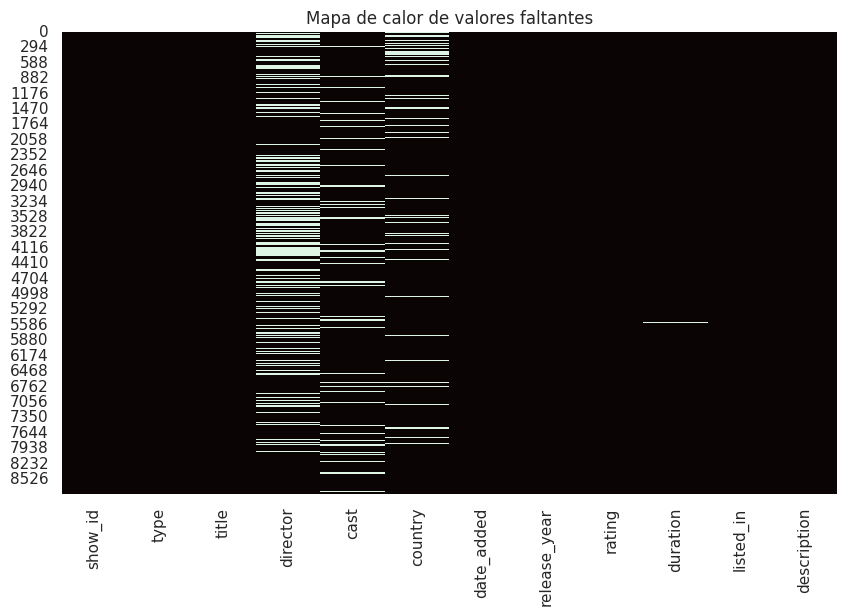

In [20]:
# Conteo de valores nulos
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Valores faltantes por columna:")
print(missing_values)

# Visualización de valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="mako")
plt.title("Mapa de calor de valores faltantes")
plt.show()

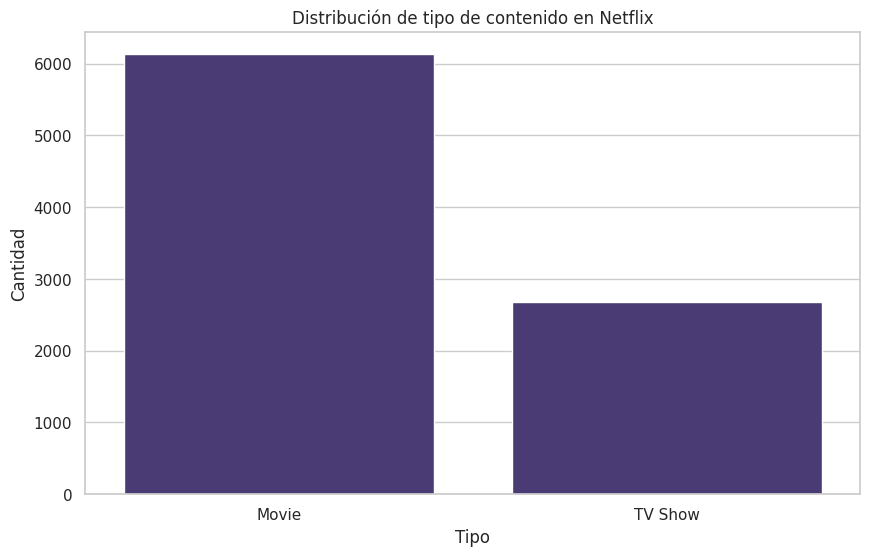

In [21]:
# Distribución por tipo de contenido
sns.countplot(data=df, x="type")
plt.title("Distribución de tipo de contenido en Netflix")
plt.xlabel("Tipo")
plt.ylabel("Cantidad")
plt.show()

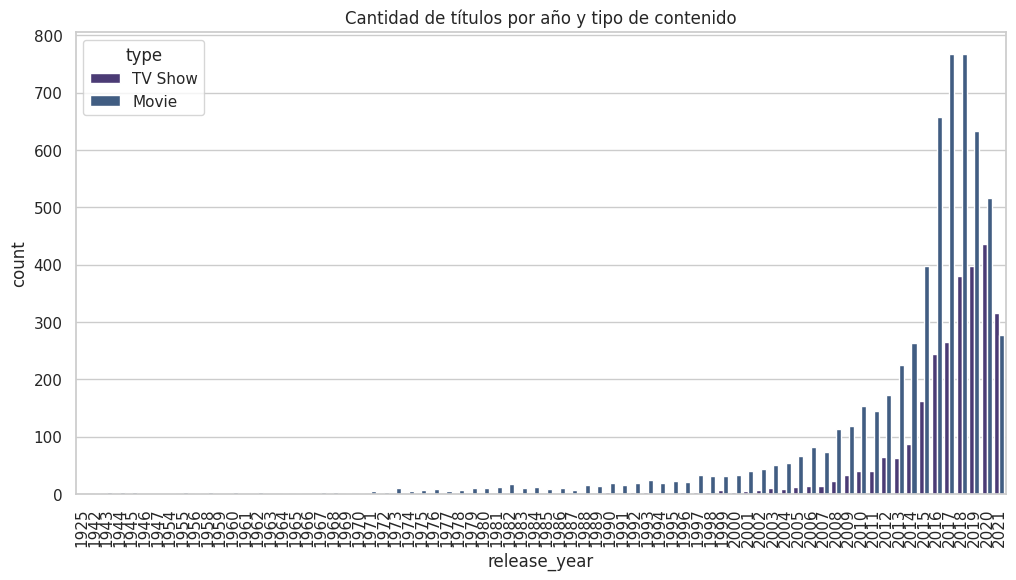

In [22]:
# Año de lanzamiento vs Tipo de contenido
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="release_year", hue="type")
plt.title("Cantidad de títulos por año y tipo de contenido")
plt.xticks(rotation=90)
plt.show()

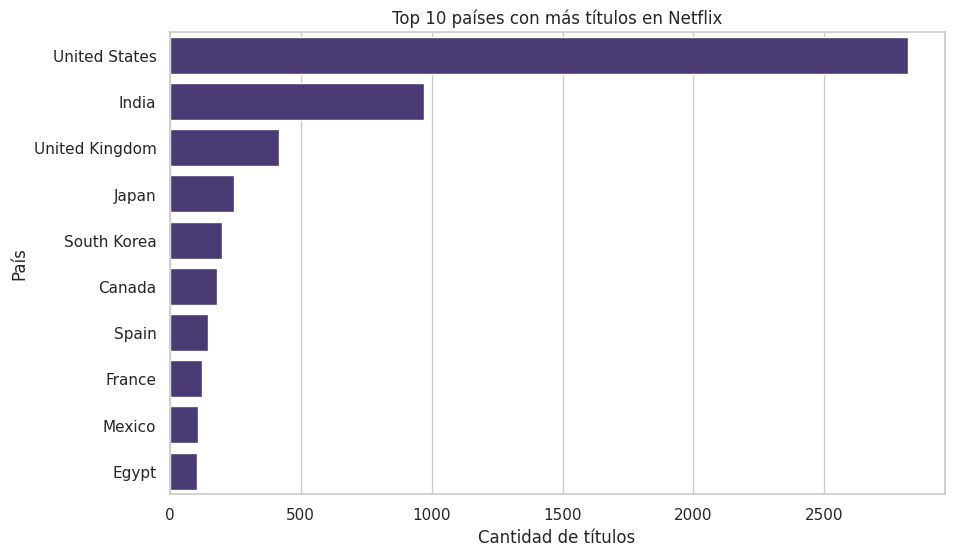

In [23]:
# Top 10 países con más títulos
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 países con más títulos en Netflix")
plt.xlabel("Cantidad de títulos")
plt.ylabel("País")
plt.show()

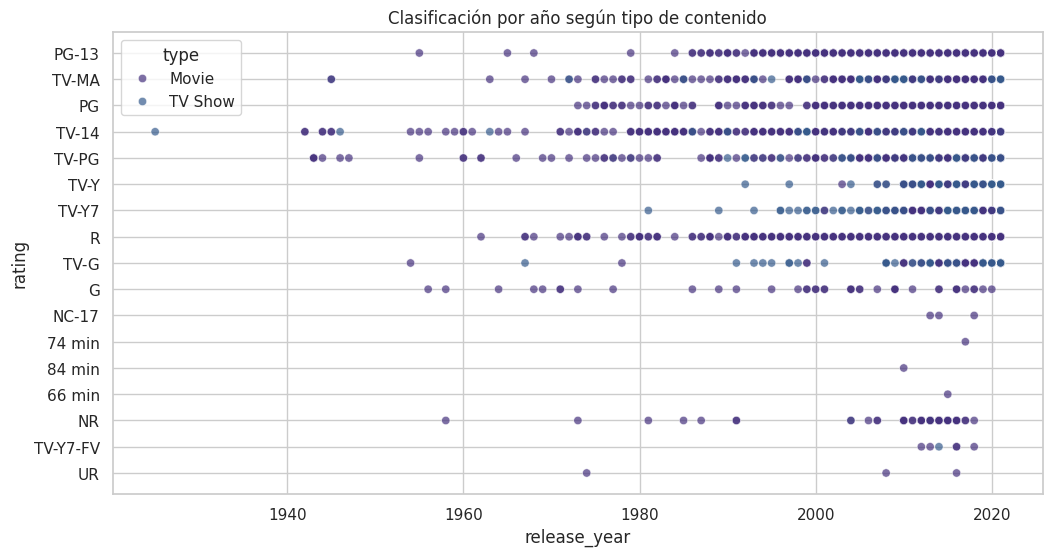

In [24]:
# Relación entre tipo, clasificación y año
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="release_year", y="rating", hue="type", alpha=0.7)
plt.title("Clasificación por año según tipo de contenido")
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-131634886.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


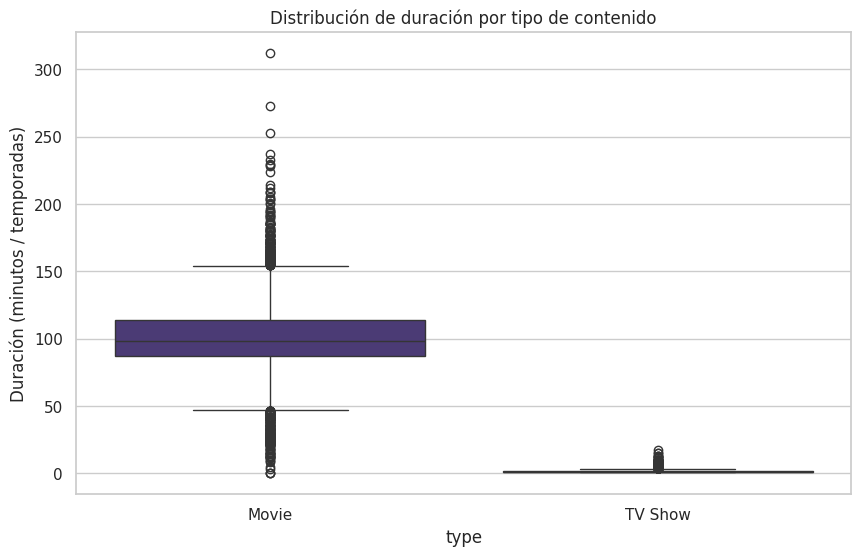

In [25]:
# Limpieza de columna duration
df['duration'] = df['duration'].fillna('0 min')
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

# Promedio de duración por tipo
sns.boxplot(data=df, x="type", y="duration_num")
plt.title("Distribución de duración por tipo de contenido")
plt.ylabel("Duración (minutos / temporadas)")
plt.show()